## Shell side heat transfer in baffled shell adn tube heat exchangers

In [ ]:
D_i = 0.2 # m shell inside diameter
D_I = 0.01 # m baffle diameter
D_B = 0.18 # m tube budnle diameter
d_0 = 0.006 # m tube outside diameter

In [1]:
import math

def calculate_num_circles(D, d):
    if d >= D:
        return 0

    radius_ratio = d / D
    area_ratio = math.pi * (radius_ratio**2)
    num_circles = math.floor(1 / area_ratio)

    return num_circles

# Example usage
D = 10  # Diameter of the larger circle
d = 2   # Diameter of the smaller circles
num_circles = calculate_num_circles(D, d)
print("Number of circles that can fit inside the larger circle:", num_circles)


Number of circles that can fit inside the larger circle: 7


In [4]:
import math
import matplotlib.pyplot as plt

def calculate_num_circles(D, d):
    if d >= D:
        return 0

    radius_ratio = d / D
    num_circles = math.floor(1 / radius_ratio)

    return num_circles

def plot_circles(D, d, num_circles):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim([0, D])
    ax.set_ylim([0, D])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Circles')

    # Plot the larger circle
    larger_circle = plt.Circle((D/2, D/2), D/2, color='blue', fill=False)
    ax.add_patch(larger_circle)

    # Plot the smaller circles
    radius = d / 2
    radius_ratio = radius / (D / 2)
    angle_increment = 2 * math.pi / num_circles
    for i in range(num_circles):
        angle = i * angle_increment
        center_x = D/2 + (D/2 - radius) * math.cos(angle)
        center_y = D/2 + (D/2 - radius) * math.sin(angle)
        circle = plt.Circle((center_x, center_y), radius, color='red', alpha=0.5)
        ax.add_patch(circle)

    plt.show()

# Example usage
D = 10  # Diameter of the larger circle
d = 2   # Diameter of the smaller circles
num_circles = calculate_num_circles(D, d)
print("Number of circles that can fit inside the larger circle:", num_circles)

plot_circles(D, d


SyntaxError: unexpected EOF while parsing (320617477.py, line 45)

Number of circles that can fit inside the larger circle: 5


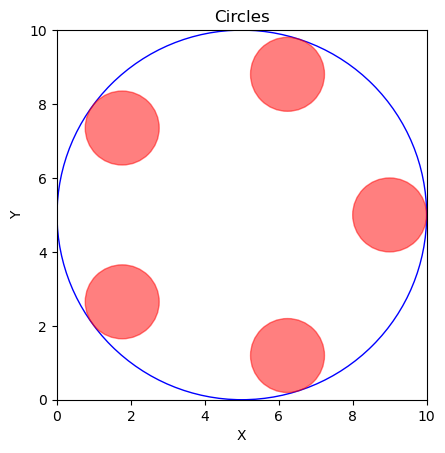

In [5]:
import math
import matplotlib.pyplot as plt

def calculate_num_circles(D, d):
    if d >= D:
        return 0

    radius_ratio = d / D
    num_circles = math.floor(1 / radius_ratio)

    return num_circles

def plot_circles(D, d, num_circles):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim([0, D])
    ax.set_ylim([0, D])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Circles')

    # Plot the larger circle
    larger_circle = plt.Circle((D/2, D/2), D/2, color='blue', fill=False)
    ax.add_patch(larger_circle)

    # Plot the smaller circles
    radius = d / 2
    radius_ratio = radius / (D / 2)
    angle_increment = 2 * math.pi / num_circles
    for i in range(num_circles):
        angle = i * angle_increment
        center_x = D/2 + (D/2 - radius) * math.cos(angle)
        center_y = D/2 + (D/2 - radius) * math.sin(angle)
        circle = plt.Circle((center_x, center_y), radius, color='red', alpha=0.5)
        ax.add_patch(circle)

    plt.show()

# Example usage
D = 10  # Diameter of the larger circle
d = 2   # Diameter of the smaller circles
num_circles = calculate_num_circles(D, d)
print("Number of circles that can fit inside the larger circle:", num_circles)

plot_circles(D, d, num_circles)


In [10]:
import math
import random
 
# pretty tuple indices
X = 0
Y = 1
RADIUS = 2
 
# I've never seen good documentation for the following type of parameter and I'm afraid that 
# this is no exception. Briefly, after sorting the radii in descending order by size, the list 
# is split along SORT_PARAM_1 and the second piece # is randomized. The pieces are then added
#  back together and the list is split along SORT_PARAM_2 and the first piece is 
# shuffled. The lists are then added together and returned.
 
SORT_PARAM_1 = .80 
SORT_PARAM_2 = .10 
# (1, 0) = totally sorted   - appealing border, very dense center, sparse midradius
# (0, 1), (1, 1) = totally randomized  - well packed center, ragged border
 
# these constants control how close our points are placed to each other
RADIAL_RESOLUTION = .4
ANGULAR_RESOLUTION = .4
 
# this keeps the boundaries from touching
PADDING = 0
 
def assert_no_intersections(f):
    def asserter(*args, **kwargs):
        circles = f(*args, **kwargs)
        intersections = 0
        for c1 in circles:
            for c2 in circles:
                if c1 is not c2 and distance(c1, c2) < c1[RADIUS] + c2[RADIUS]:
                    intersections += 1
                    break
        print("{0} intersections".format(intersections))
        if intersections:
            raise AssertionError('Doh!')
        return circles
    return asserter
 
@assert_no_intersections
def positionCircles(rn):
 
    points = base_points(ANGULAR_RESOLUTION, RADIAL_RESOLUTION)
    free_points = []
    radii = fix_radii(rn)
 
    circles = []
    point_count = 0
    for radius in radii:
        print(f"{0} free points available, {1} circles placed, {2} points examined").format(len(free_points), 
                                                                                          len(circles), 
                                                                                          point_count)
        i, L = 0, len(free_points)
        while i < L:
            if available(circles, free_points[i], radius):
                make_circle(free_points.pop(i), radius, circles, free_points)
                break  
            else:
                i += 1   
        else:
            for point in points:
                point_count += 1
                if available(circles, point, radius):
                    make_circle(point, radius, circles, free_points) 
                    break
                else:
                    if not contained(circles, point):
                        free_points.append(point)
    return circles
 
def fix_radii(radii):
    radii = sorted(rn, reverse=True)
    radii_len = len(radii)
 
    section1_index = int(radii_len * SORT_PARAM_1)
    section2_index = int(radii_len * SORT_PARAM_2)
 
    section1, section2 = radii[:section1_index], radii[section1_index:]
    random.shuffle(section2)
    radii = section1 + section2
 
    section1, section2 = radii[:section2_index], radii[section2_index:]
    random.shuffle(section1)
    return section1 + section2
 
def make_circle(point, radius, circles, free_points):
    new_circle = point + (radius, )
    circles.append(new_circle)
    i = len(free_points) - 1
    while i >= 0:
        if contains(new_circle, free_points[i]):
            free_points.pop(i)
        i -= 1
                   
def available(circles, point, radius):
    for circle in circles:
        if distance(point, circle) < radius + circle[RADIUS] + PADDING:
            return False
    return True
        
 
def base_points(radial_res, angular_res):
    circle_angle = 2 * math.pi
    r = 0
    while 1:
        theta = 0
        while theta <= circle_angle:
            yield (r * math.cos(theta), r * math.sin(theta))
            r_ = math.sqrt(r) if r > 1 else 1
            theta += angular_res/r_
        r += radial_res    
 
 
def distance(p0, p1):
    return math.sqrt((p0[X] - p1[X])**2 + (p0[Y] - p1[Y])**2) 
 
 
def contains(circle, point):
    return distance(circle, point) < circle[RADIUS] + PADDING
 
def contained(circles, point):
    return any(contains(c, point) for c in circles)

In [12]:
pip install packcircles

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyllist: filename=pyllist-0.3-py3-none-any.whl size=7402 sha256=e21b57b0fe3f1b1e14d7c1a1f87aa9efb2ba7775f244830a5b1f4cd1f428fb53
  Stored in directory: c:\users\marko\appdata\local\pip\cache\wheels\4c\1d\ef\8f20ff06fa87e98ef6b0301718f6c0480e7cafdc8aa97426fd
Successfully built pyllist
Note: you may need to restart the kernel to use updated packages.


In [14]:
[4]*6

[4, 4, 4, 4, 4, 4]

(-150.0, 140.0, -180.0, 170.0)

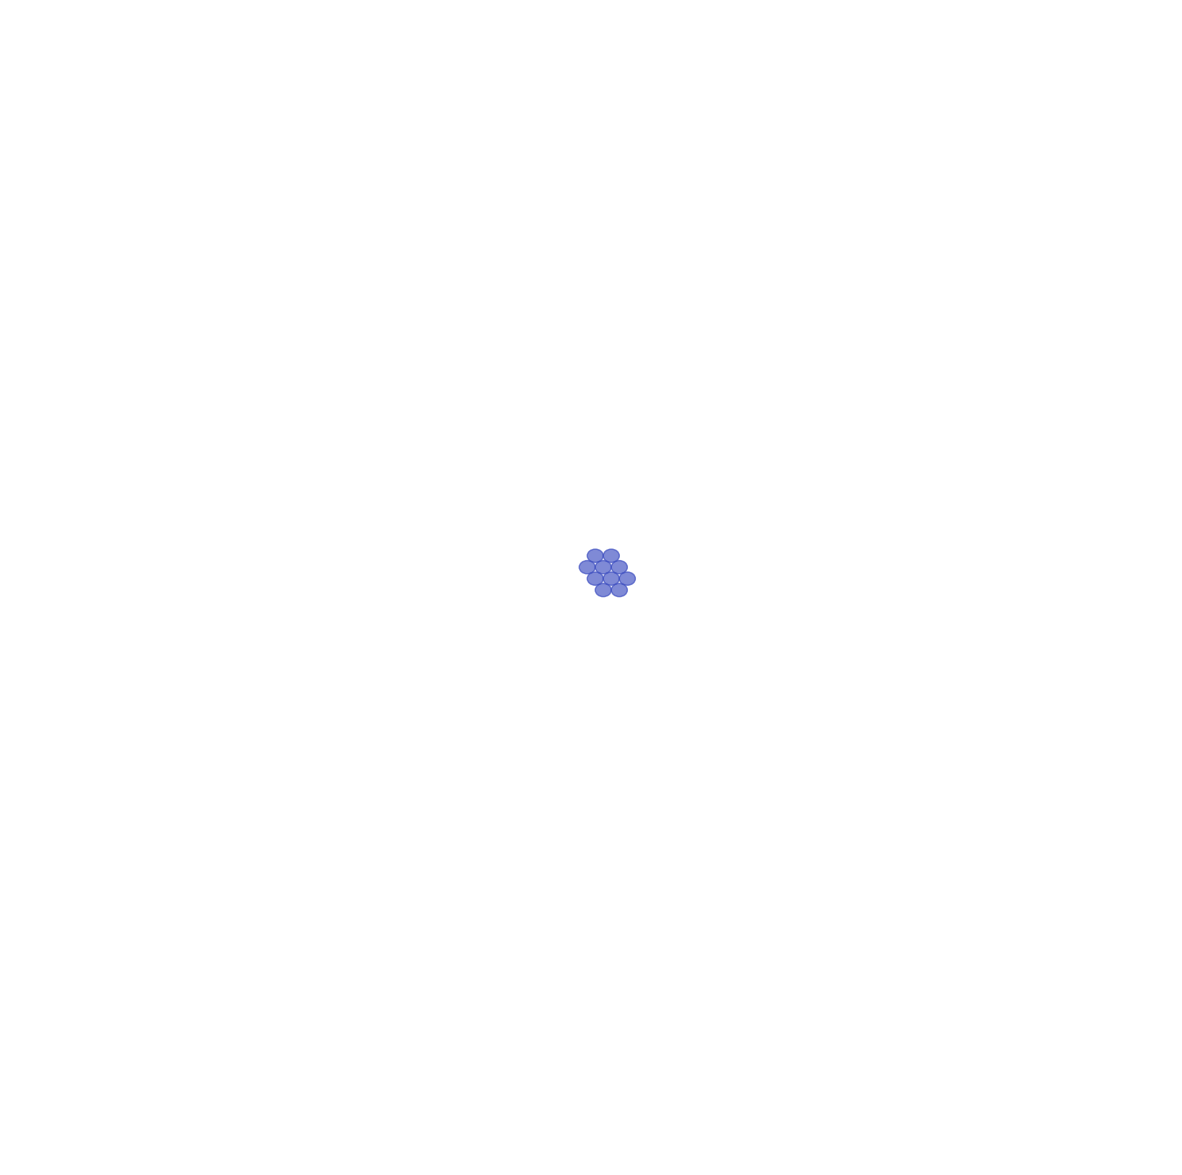

In [15]:
import packcircles as pc
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
radii =  10*[2]
fig, ax = plt.subplots()
cmap = get_cmap('coolwarm_r')
circles = pc.pack(radii)
for (x,y,radius) in circles:
    patch = plt.Circle(
        (x,y),
        radius,
        color=cmap(radius/max(radii)),
        alpha=0.65
    )
    ax.add_patch(patch)
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set(xlim=(-150, 140), ylim=(-180, 170))
plt.axis('off')

# Model thermal

In [ ]:
L = 0.2 # m tube length
D = 0.3 # m shell inside diameter

v = 20 # m/s fluid velocity
rho = 1000 # kg/m3 fluid density
mu = 0.001 # Pa*s fluid viscosity

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_temperature_distribution(length, inner_diameter, air_velocity, air_temperature, steel_thickness):
    num_points = 100  # Number of discrete points along the length of the tube

    # Calculate cross-sectional area and hydraulic diameter
    cross_sectional_area = np.pi * (inner_diameter / 2) ** 2
    hydraulic_diameter = inner_diameter

    # Calculate Reynolds number
    air_density = 1.184  # Density of air at 400K (kg/m^3)
    air_viscosity = 2.83e-5  # Dynamic viscosity of air at 400K (kg/m/s)
    reynolds_number = air_density * air_velocity * hydraulic_diameter / air_viscosity

    # Calculate Nusselt number and heat transfer coefficient
    prandtl_number = 0.702  # Prandtl number of air at 400K
    nusselt_number = 0.3 * reynolds_number ** 0.6 * prandtl_number ** 0.33
    heat_transfer_coefficient = nusselt_number * air_viscosity / hydraulic_diameter

    # Calculate thermal resistance and temperature distribution
    thermal_resistance = steel_thickness / (heat_transfer_coefficient * cross_sectional_area)
    temperature_distribution = air_temperature + (air_temperature - air_temperature) * np.exp(-length / thermal_resistance)

    return temperature_distribution

# Tube properties
length = 1.0  # Length of the tube (m)
inner_diameter = 0.3  # Inner diameter of the tube (m)
steel_thickness = 0.001  # Thickness of the steel tube (m)

# Air properties
air_temperature = 400  # Temperature of the air (K)
air_velocity = 20  # Velocity of the air (m/s)

# Calculate temperature distribution
temperature_distribution = calculate_temperature_distribution(length, inner_diameter, air_velocity, air_temperature, steel_thickness)

# Plotting the temperature distribution
distance = np.linspace(0, length, len(temperature_distribution))
plt.plot(distance, temperature_distribution)
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Distribution along the Tube')
plt.grid(True)
plt.show()


TypeError: object of type 'numpy.float64' has no len()

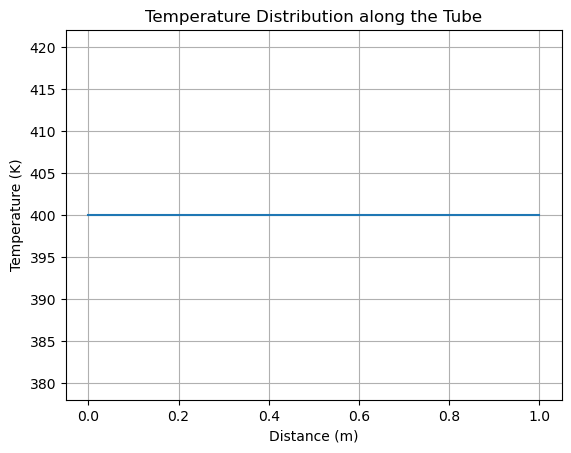

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_temperature_distribution(length, inner_diameter, air_velocity, air_temperature, steel_thickness):
    num_points = 100  # Number of discrete points along the length of the tube

    # Calculate cross-sectional area and hydraulic diameter
    cross_sectional_area = np.pi * (inner_diameter / 2) ** 2
    hydraulic_diameter = inner_diameter

    # Calculate Reynolds number
    air_density = 1.184  # Density of air at 400K (kg/m^3)
    air_viscosity = 2.83e-5  # Dynamic viscosity of air at 400K (kg/m/s)
    reynolds_number = air_density * air_velocity * hydraulic_diameter / air_viscosity

    # Calculate Nusselt number and heat transfer coefficient
    prandtl_number = 0.702  # Prandtl number of air at 400K
    nusselt_number = 0.3 * reynolds_number ** 0.6 * prandtl_number ** 0.33
    heat_transfer_coefficient = nusselt_number * air_viscosity / hydraulic_diameter

    # Calculate thermal resistance and temperature distribution
    thermal_resistance = steel_thickness / (heat_transfer_coefficient * cross_sectional_area)
    distance = np.linspace(0, length, num_points)
    temperature_distribution = air_temperature + (air_temperature - air_temperature) * np.exp(-distance / thermal_resistance)

    return temperature_distribution

# Tube properties
length = 1.0  # Length of the tube (m)
inner_diameter = 0.3  # Inner diameter of the tube (m)
steel_thickness = 0.001  # Thickness of the steel tube (m)

# Air properties
air_temperature = 400  # Temperature of the air (K)
air_velocity = 20  # Velocity of the air (m/s)

# Calculate temperature distribution
temperature_distribution = calculate_temperature_distribution(length, inner_diameter, air_velocity, air_temperature, steel_thickness)

# Plotting the temperature distribution
distance = np.linspace(0, length, num=len(temperature_distribution))
plt.plot(distance, temperature_distribution)
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Distribution along the Tube')
plt.grid(True)
plt.show()


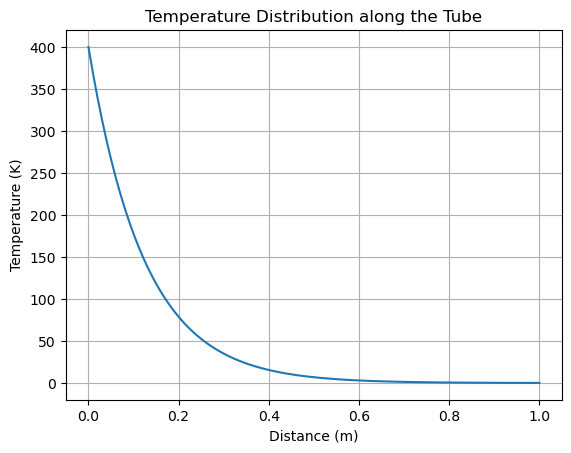

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_temperature_distribution(length, inner_diameter, air_velocity, air_temperature, steel_thickness):
    num_points = 100  # Number of discrete points along the length of the tube

    # Calculate cross-sectional area and hydraulic diameter
    cross_sectional_area = np.pi * (inner_diameter / 2) ** 2
    hydraulic_diameter = inner_diameter

    # Calculate Reynolds number
    air_density = 1.184  # Density of air at 400K (kg/m^3)
    air_viscosity = 2.83e-5  # Dynamic viscosity of air at 400K (kg/m/s)
    reynolds_number = air_density * air_velocity * hydraulic_diameter / air_viscosity

    # Calculate Nusselt number and heat transfer coefficient
    prandtl_number = 0.702  # Prandtl number of air at 400K
    nusselt_number = 0.3 * reynolds_number ** 0.6 * prandtl_number ** 0.33
    heat_transfer_coefficient = nusselt_number * air_viscosity / hydraulic_diameter

    # Calculate thermal resistance and temperature distribution
    thermal_resistance = steel_thickness / (heat_transfer_coefficient * cross_sectional_area)
    distance = np.linspace(0, length, num_points)
    temperature_distribution = air_temperature * np.exp(-distance / thermal_resistance)

    return temperature_distribution

# Tube properties
length = 1.0  # Length of the tube (m)
inner_diameter = 0.3  # Inner diameter of the tube (m)
steel_thickness = 0.001  # Thickness of the steel tube (m)

# Air properties
air_temperature = 400  # Temperature of the air (K)
air_velocity = 100  # Velocity of the air (m/s)

# Calculate temperature distribution
temperature_distribution = calculate_temperature_distribution(length, inner_diameter, air_velocity, air_temperature, steel_thickness)

# Plotting the temperature distribution
distance = np.linspace(0, length, num=len(temperature_distribution))
plt.plot(distance, temperature_distribution)
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Distribution along the Tube')
plt.grid(True)
plt.show()
